In [2]:
##importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
#Loading Dataset
df = pd.read_csv('/content/ToyotaCorolla.csv', encoding = 'latin-1')
df.head(5)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
#Info
df.info()
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

(1436, 38)

In [6]:
#checking null values
df.isnull().sum()
print("No null values")

No null values


<Figure size 1500x1000 with 0 Axes>

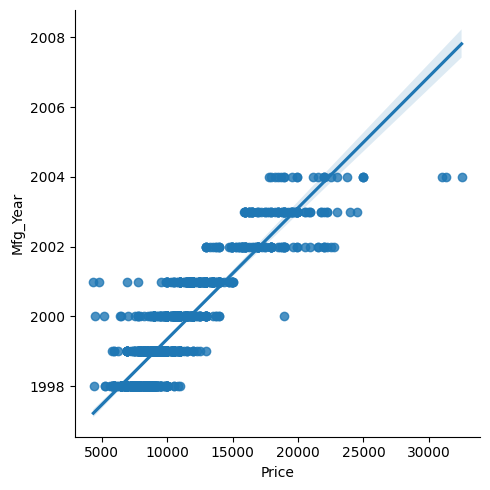

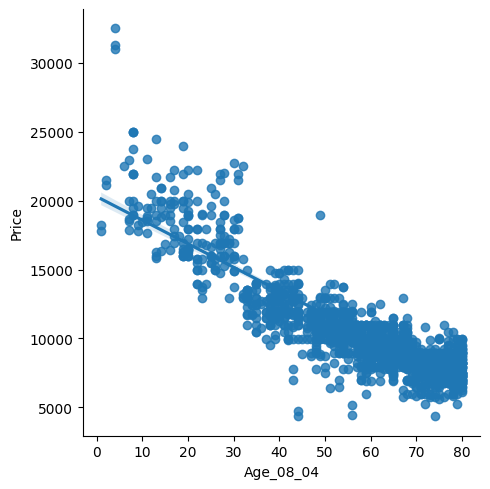

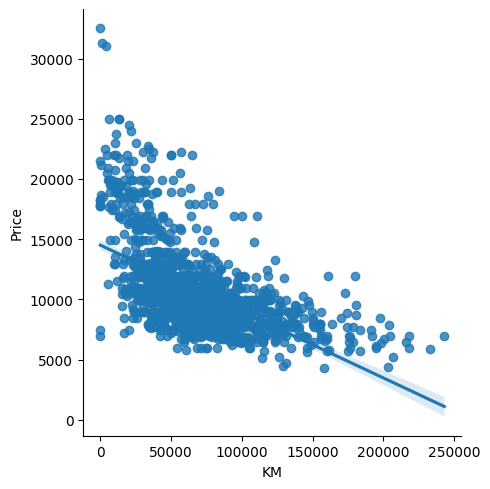

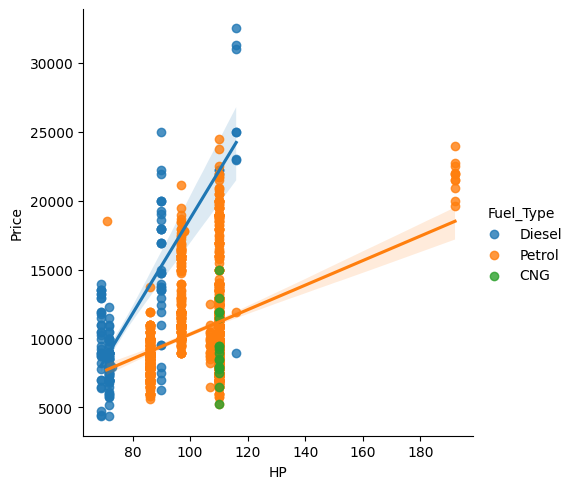

In [19]:
##plotting charts and patterns
def insights():

  plt.figure(figsize=(15,10))
  sns.lmplot(x= 'Price', y = 'Mfg_Year', data = df)
  sns.lmplot(x= 'Age_08_04', y = 'Price', data = df)
  sns.lmplot(x= 'KM', y = 'Price', data = df)
  sns.lmplot(x= 'HP', y = 'Price', data = df, hue='Fuel_Type')
  plt.show()
insights()


###Inference -
1.Latest the manufacturing year, higher the price of the car.

2.Lower the Age of the model, lower is the price.

3.Less Km driven, higher the price.

4.More the Hp in Diesel and Petrol, more the price.

In [20]:
##EDA and model selection
x = df[['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfg_Year']]
y = df['Price']

In [23]:
##spliting the trainig an testing data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1077, 9), (359, 9), (1077,), (359,))

In [26]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)
model

LinearRegression()

In [27]:
##predicting the outcomes
pred = model.predict(X_test)
pred

array([11241.91025815,  9416.59115692,  9068.99588099,  8441.77302031,
       10120.84801056,  8187.55328395,  9173.43491775,  8310.65030182,
       13553.95554517, 13730.38452694,  9795.73353677,  9836.61269608,
       13456.17043302, 12772.78279197,  9505.92885101,  8463.8560757 ,
       12400.89089731, 16877.94193803,  6985.23816539,  8675.4862017 ,
       12887.67119496, 17775.2965256 ,  8107.70500415, 10850.70730553,
        6703.53804028, 16174.30968524,  9104.55445934,  7044.68744611,
       15606.1435268 , 14006.38531214,  7818.93203561,  9711.71653093,
        8421.39498216,  9653.56202909,  9829.85967225,  7929.29873369,
        9112.02792333,  9621.76578858, 15687.66005757,  9328.95331721,
        9841.14977018,  9704.46349167,  8185.45548637,  5312.08305936,
        6718.19893911, 17562.75007912,  9502.33231371, 10111.99589454,
        8740.04964739, 13997.84155869, 13456.45880169,  6783.42658189,
       15028.22623793, 16430.85143961,  5779.83228756,  7931.79055191,
      

In [30]:
df_pred = pd.DataFrame(pred, columns=["Predicted_Price"])
df_pred['Actual_Price'] = y_test.values
df_pred

,Predicted_Price,Actual_Price
0,11241.910258,10800
1,9416.591157,9950
2,9068.995881,7500
3,8441.773020,9250
4,10120.848011,9750
...,...,...
354,7586.007063,5950
355,16548.074468,15950
356,9194.917724,8250
357,13199.493322,10500


In [31]:
###Checking the accuracy using regression model betwen the trainig and the testing model
print('Training Accuracy: ', model.score(X_train, y_train))
print('Testing Accuracy: ', model.score(X_test, y_test))

Training Accuracy:  0.8741017391084502
Testing Accuracy:  0.868189287855552


In [32]:
###Using Ridge to correct the underfitting data
ridge = Ridge()
ridge_model = ridge.fit(X_train, y_train)
ridge_model

Ridge()

In [33]:
X_ridge_pred = ridge.predict(X_test)

In [34]:
###Checking the accuracy using Ridge model betwen the trainig and the testing model
print('Training Accuracy of ridge: ', ridge_model.score(X_train, y_train))
print('Testing Accuracy of ridge: ', ridge_model.score(X_test, y_test))

Training Accuracy of ridge:  0.8740998088334551
Testing Accuracy of ridge:  0.8682032240325823


In [37]:
##checking the errors produced using ridge model
ridge_mse = mean_squared_error(y_test, X_ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = round(r2_score(y_test, X_ridge_pred),3)

print('R2 Score: ', ridge_r2)

R2 Score:  0.868


In [38]:
###Therefore it is a generalized data

In [39]:
##Saving the ridge trained model using joblib
joblib.dump(ridge_model, 'ridge_model.pkl')

['ridge_model.pkl']